#Data Generation

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import unicodedata

np.random.seed(42)
n = 1000  # Adjust size as needed

# -----------------------------
# 1. MENU TABLE (UTF-8 SAFE)
# -----------------------------
menu_items = [
    "Pike Place Roast (hot)", "Caffè Latte (hot)", "Iced Caffè Latte",
    "Cold Brew Coffee", "Caramel Frappuccino Blended Beverage",
    "Java Chip Frappuccino Blended Beverage", "Strawberry Açaí Refresher",
    "Mango Dragonfruit Refresher", "Hot Chocolate", "Steamed Milk",
    "Chai Tea Latte (hot)", "Iced Passion Tango Tea",
    "Bacon, Gouda & Egg Sandwich", "Double-Smoked Bacon, Cheddar & Egg Sandwich",
    "Egg Bites (various flavors)", "Plain Bagel", "Chocolate Croissant",
    "Blueberry Muffin", "Cheese Danish", "Iced Lemon Loaf",
    "Banana Walnut & Pecan Loaf", "Pumpkin & Pepita Loaf",
    "Chocolate Cake Pop", "Cookies & Cream Cake Pop", "Snowman Cookie (seasonal)",
    "Crispy Grilled Cheese Sandwich", "Cheese & Fruit Protein Box"
]

menu_categories = [
    "Hot Coffee", "Hot Coffee", "Cold Coffee", "Cold Coffee",
    "Frappuccino Blended Beverage", "Frappuccino Blended Beverage",
    "Starbucks Refreshers Beverage", "Starbucks Refreshers Beverage",
    "Hot Chocolate & More", "Hot Chocolate & More",
    "Hot Tea", "Cold Tea", "Hot Breakfast", "Hot Breakfast", "Hot Breakfast",
    "Bakery", "Bakery", "Bakery", "Bakery", "Cakes and Loaves",
    "Cakes and Loaves", "Cakes and Loaves", "Cake Pops and Cookies",
    "Cake Pops and Cookies", "Cake Pops and Cookies",
    "Lunch / Sandwiches", "Protein Boxes & Snacks"
]

item_to_category = dict(zip(menu_items, menu_categories))

# Normalize menu items just to be safe
menu_items = [unicodedata.normalize("NFKC", x) for x in menu_items]

# -----------------------------
# 2. REALISTIC AGE DISTRIBUTION
# -----------------------------
age = np.random.normal(loc=30, scale=10, size=n).astype(int)
age = np.clip(age, 18, 65)

# -----------------------------
# 3. INCOME (correlated with age)
# -----------------------------
income = (age * np.random.uniform(800, 2000, n)) + np.random.randint(0, 15000, n)
income = income.astype(int)

# -----------------------------
# 4. STORE LOCATION PATTERNS
# -----------------------------
stores = [
    "W.P. Carey Starbucks",
    "Noble Library Starbucks",
    "Hayden Library Starbucks",
    "Fulton Starbucks",
    "MU Starbucks"
]

store_probs = [0.30, 0.15, 0.20, 0.15, 0.20]
store_location = np.random.choice(stores, size=n, p=store_probs)

# -----------------------------
# 5. TIME OF DAY (store-dependent)
# -----------------------------
def get_order_time(store):
    if store == "W.P. Carey Starbucks":
        return np.random.choice(["Morning", "Afternoon"], p=[0.60, 0.40])
    if store == "Hayden Library Starbucks":
        return np.random.choice(["Afternoon", "Evening"], p=[0.40, 0.60])
    if store == "MU Starbucks":
        return np.random.choice(["Morning", "Afternoon", "Evening"], p=[0.40, 0.40, 0.20])
    return np.random.choice(["Morning", "Afternoon", "Evening"], p=[0.30, 0.50, 0.20])

order_time = np.array([get_order_time(s) for s in store_location])

# -----------------------------
# 6. DAY OF WEEK (weekday heavy)
# -----------------------------
days = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
day_probs = [0.16, 0.16, 0.16, 0.16, 0.12, 0.12, 0.12]
day_of_week = np.random.choice(days, size=n, p=day_probs)

# -----------------------------
# 7. AGE-BASED ITEM SELECTION
# -----------------------------

# FIXED PROBABILITIES → normalized properly
probs_young = np.array([
    0.02,0.02,0.08,0.08,0.10,0.10,0.12,0.12,
    0.02,0.02,0.03,0.03,0.01,0.01,0.01,0.05,
    0.05,0.05,0.05,0.03,0.03,0.03,0.07,0.07,
    0.03,0.01,0.01
])
probs_young /= probs_young.sum()

probs_old = np.array([
    0.10,0.10,0.05,0.05,0.02,0.02,0.01,0.01,
    0.08,0.08,0.08,0.05,0.10,0.10,0.10,0.04,
    0.04,0.04,0.04,0.01,0.01,0.01,0.01,0.01,
    0.01,0.05,0.05
])
probs_old /= probs_old.sum()

def pick_item(a):
    if a < 25:
        return np.random.choice(menu_items, p=probs_young)
    elif a < 40:
        return np.random.choice(menu_items, p=np.ones(len(menu_items))/len(menu_items))
    else:
        return np.random.choice(menu_items, p=probs_old)

chosen_items = np.array([pick_item(a) for a in age])
chosen_categories = [item_to_category[i] for i in chosen_items]

# -----------------------------
# 8. PRICE (income-influenced)
# -----------------------------
price_lookup = {
    "Hot Coffee": (3,5.5),
    "Cold Coffee": (3.5,6),
    "Frappuccino Blended Beverage": (5,7.5),
    "Starbucks Refreshers Beverage": (4,6),
    "Hot Chocolate & More": (3,5),
    "Hot Tea": (2.5,4.5),
    "Cold Tea": (2.5,4.5),
    "Hot Breakfast": (4,7.5),
    "Bakery": (2.5,5),
    "Cakes and Loaves": (3,4.5),
    "Cake Pops and Cookies": (1.5,3.5),
    "Lunch / Sandwiches": (5,9),
    "Protein Boxes & Snacks": (5,8)
}

def price_with_income(category, inc):
    low, high = price_lookup[category]
    return np.random.uniform(low, high + inc/300000)

base_prices = np.array([price_with_income(cat, inc) for cat, inc in zip(chosen_categories, income)])

# -----------------------------
# 9. PAYMENT TYPE + ADDONS
# -----------------------------
payment_type = np.random.choice(["App","Card"], n, p=[0.55, 0.45])

addons = np.where(
    payment_type=="App",
    np.random.uniform(0.8, 2.5, n),
    np.random.uniform(0.0, 1.2, n)
).round(2)

total_cost = (base_prices + addons).round(2)

# -----------------------------
# 10. SATISFACTION
# -----------------------------
loyalty = np.random.choice([0,1], n, p=[0.60,0.40])
campaign = np.random.choice([0,1], n, p=[0.70,0.30])

satisfaction = (
    np.random.uniform(3.0,4.6,n) +
    loyalty*0.3 +
    campaign*0.25 -
    (addons > 2.0)*0.1
).clip(1,5).round(2)

# -----------------------------
# FINAL DATAFRAME
# -----------------------------
df = pd.DataFrame({
    "CustomerID": np.arange(2000, 2000+n),
    "Age": age,
    "Income": income,
    "StoreLocation": store_location,
    "OrderTime": order_time,
    "DayOfWeek": day_of_week,
    "MenuItem": chosen_items,
    "MenuCategory": chosen_categories,
    "BasePrice": base_prices.round(2),
    "AddOnsCost": addons,
    "TotalCost": total_cost,
    "PaymentType": payment_type,
    "LoyaltyMember": loyalty,
    "CampaignExposure": campaign,
    "SatisfactionScore": satisfaction
})

# Normalize text columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].apply(lambda x: unicodedata.normalize("NFKC", x))

df.to_csv("starbucks_realistic_dataset.csv", index=False, encoding="utf-8-sig")
print("Dataset generated → starbucks_realistic_dataset.csv")


Dataset generated → starbucks_realistic_dataset.csv


#Problem Statement:Which customers are most likely to switch from Card to App, so Starbucks can send targeted app-only promotions?

###Importing necessary Libraries and reading the Data Set,Printing first few headers

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/starbucks_realistic_dataset.csv")
df.head()


,CustomerID,Age,Income,StoreLocation,OrderTime,DayOfWeek,MenuItem,MenuCategory,BasePrice,AddOnsCost,TotalCost,PaymentType,LoyaltyMember,CampaignExposure,SatisfactionScore
0,2000,34,43438,Noble Library Starbucks,Afternoon,Tue,Blueberry Muffin,Bakery,5.06,0.97,6.03,Card,0,0,3.43
1,2001,28,27072,Noble Library Starbucks,Afternoon,Sun,Iced Passion Tango Tea,Cold Tea,4.41,1.03,5.44,Card,1,0,4.67
2,2002,36,60943,Fulton Starbucks,Morning,Sun,Cold Brew Coffee,Cold Coffee,3.95,2.25,6.20,App,0,0,3.81
3,2003,45,86840,MU Starbucks,Afternoon,Wed,Caffè Latte (hot),Hot Coffee,3.34,1.21,4.55,App,1,1,4.28
4,2004,27,27610,MU Starbucks,Afternoon,Mon,Pike Place Roast (hot),Hot Coffee,3.22,2.29,5.51,App,0,0,3.14


###shape & info

In [3]:
df.shape ###800 rows , 17columns

(1000, 15)

In [4]:
df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1000 non-null   int64  
 1   Age                1000 non-null   int64  
 2   Income             1000 non-null   int64  
 3   StoreLocation      1000 non-null   object 
 4   OrderTime          1000 non-null   object 
 5   DayOfWeek          1000 non-null   object 
 6   MenuItem           1000 non-null   object 
 7   MenuCategory       1000 non-null   object 
 8   BasePrice          1000 non-null   float64
 9   AddOnsCost         1000 non-null   float64
 10  TotalCost          1000 non-null   float64
 11  PaymentType        1000 non-null   object 
 12  LoyaltyMember      1000 non-null   int64  
 13  CampaignExposure   1000 non-null   int64  
 14  SatisfactionScore  1000 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 117.3+ KB


###Missing Values

In [5]:
df.isna().sum() #there are no na's

,0
CustomerID,0
Age,0
Income,0
StoreLocation,0
OrderTime,0
DayOfWeek,0
MenuItem,0
MenuCategory,0
BasePrice,0
AddOnsCost,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df["Age"].describe()

,Age
count,1000.000000
mean,30.191000
std,8.907292
min,18.000000
25%,23.000000
50%,30.000000
75%,36.000000
max,65.000000


<Axes: xlabel='Age', ylabel='Count'>

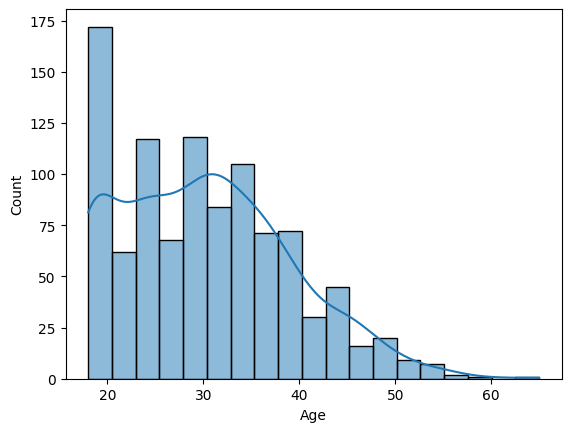

In [8]:
import seaborn as sns
sns.histplot(df["Age"], kde=True)


In [9]:
df["TotalCost"].describe()

,TotalCost
count,1000.000000
mean,5.822230
std,1.594198
min,1.940000
25%,4.700000
50%,5.710000
75%,6.870000
max,11.340000


<Axes: xlabel='TotalCost', ylabel='Count'>

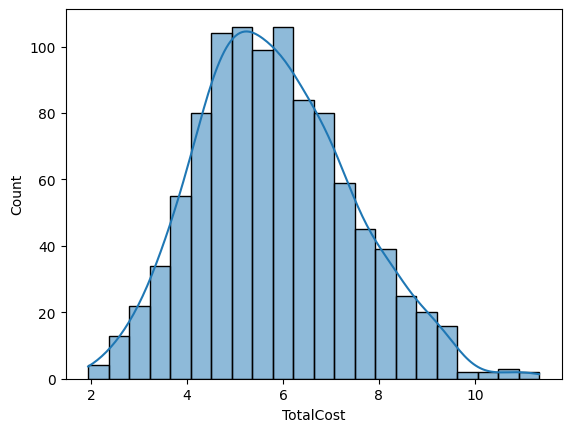

In [10]:
sns.histplot(df["TotalCost"], kde=True)


In [11]:
df.value_counts('MenuCategory')

,count
MenuCategory,
Bakery,122
Hot Breakfast,116
Frappuccino Blended Beverage,107
Cake Pops and Cookies,100
Cold Coffee,98
Starbucks Refreshers Beverage,98
Cakes and Loaves,86
Hot Chocolate & More,75
Hot Coffee,71


###Study is across 13 categories of items

In [12]:
df.groupby("StoreLocation")["CustomerID"].nunique()
#count of customers across store locations


,CustomerID
StoreLocation,
Fulton Starbucks,157
Hayden Library Starbucks,185
MU Starbucks,200
Noble Library Starbucks,149
W.P. Carey Starbucks,309


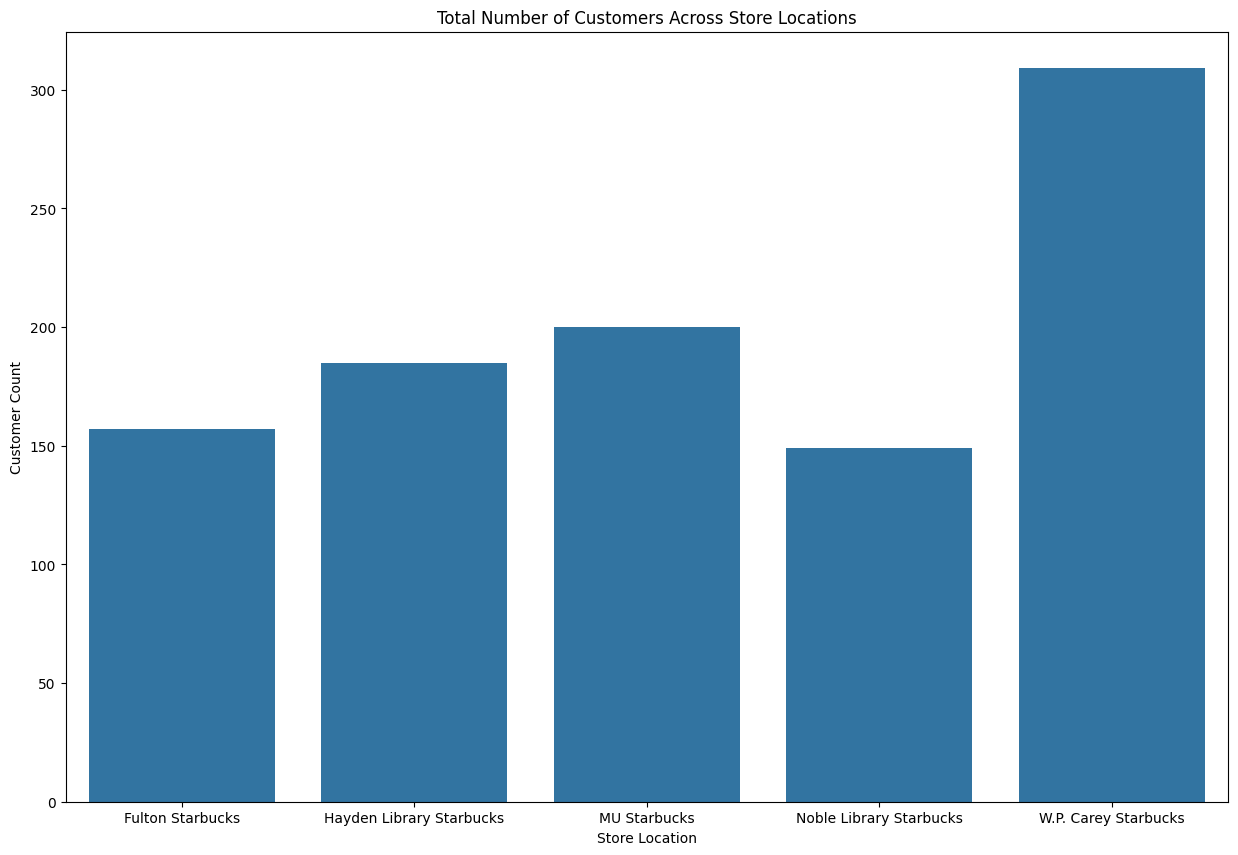

In [13]:
import matplotlib.pyplot as plt

store_counts = df.groupby("StoreLocation")["CustomerID"].count().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(data=store_counts, x="StoreLocation", y="CustomerID")
plt.xticks(rotation=0)
plt.title("Total Number of Customers Across Store Locations")
plt.ylabel("Customer Count")
plt.xlabel("Store Location")
plt.show()


#EXPLORATORY DATA ANALYSIS

<Axes: >

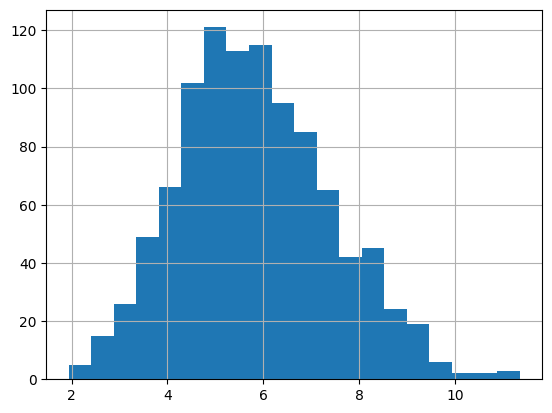

In [14]:
df["TotalCost"].hist(bins=20)


###Cost is normally distribtued with most items priced between 4$ and 8$

<Axes: >

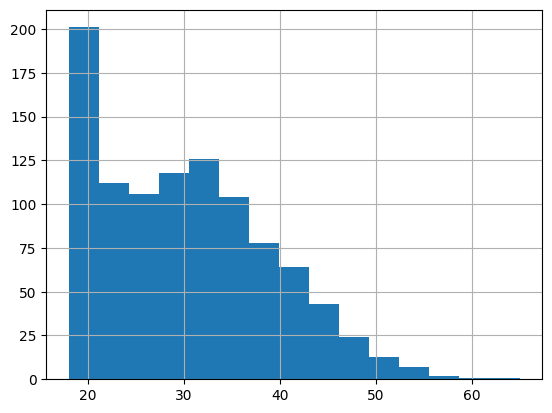

In [15]:
df["Age"].hist(bins=15)

###There are more younger audience ,next followed by the age group of 30-40

<Axes: >

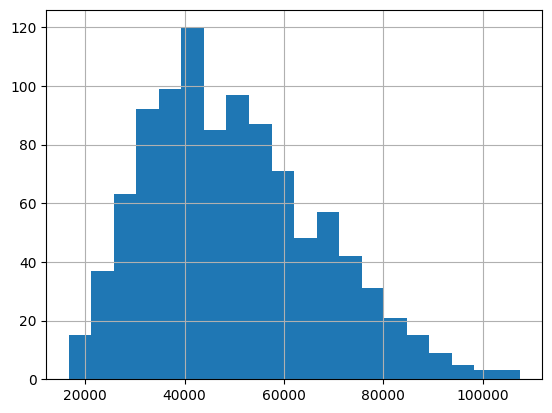

In [16]:

df["Income"].hist(bins=20)


###Most Income level is concentrated in the range of $ 35000 & $ 60000

###Bivariate Analysis


In [17]:
df.groupby("MenuCategory")["TotalCost"].mean().sort_values()


,TotalCost
MenuCategory,
Cake Pops and Cookies,3.717600
Hot Tea,4.660000
Cakes and Loaves,4.994302
Bakery,5.050410
Cold Tea,5.212581
Hot Chocolate & More,5.407200
Hot Coffee,5.456479
Cold Coffee,5.853367
Starbucks Refreshers Beverage,6.218878


#Mean cost of various items

In [18]:
df.groupby("LoyaltyMember")["TotalCost"].max()


,TotalCost
LoyaltyMember,
0,11.34
1,11.16


###Time-based Spending Patterns

In [19]:
df.groupby("OrderTime")["TotalCost"].mean()


,TotalCost
OrderTime,
Afternoon,5.850183
Evening,5.739485
Morning,5.832629


#Week based order Patterns

<Axes: xlabel='DayOfWeek'>

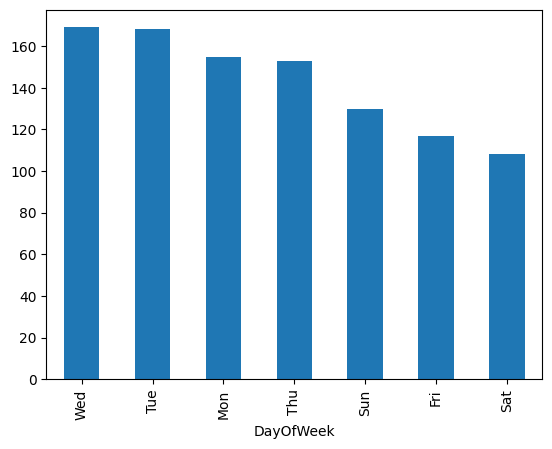

In [20]:
df["DayOfWeek"].value_counts().plot(kind="bar")


###Correlation Analysis

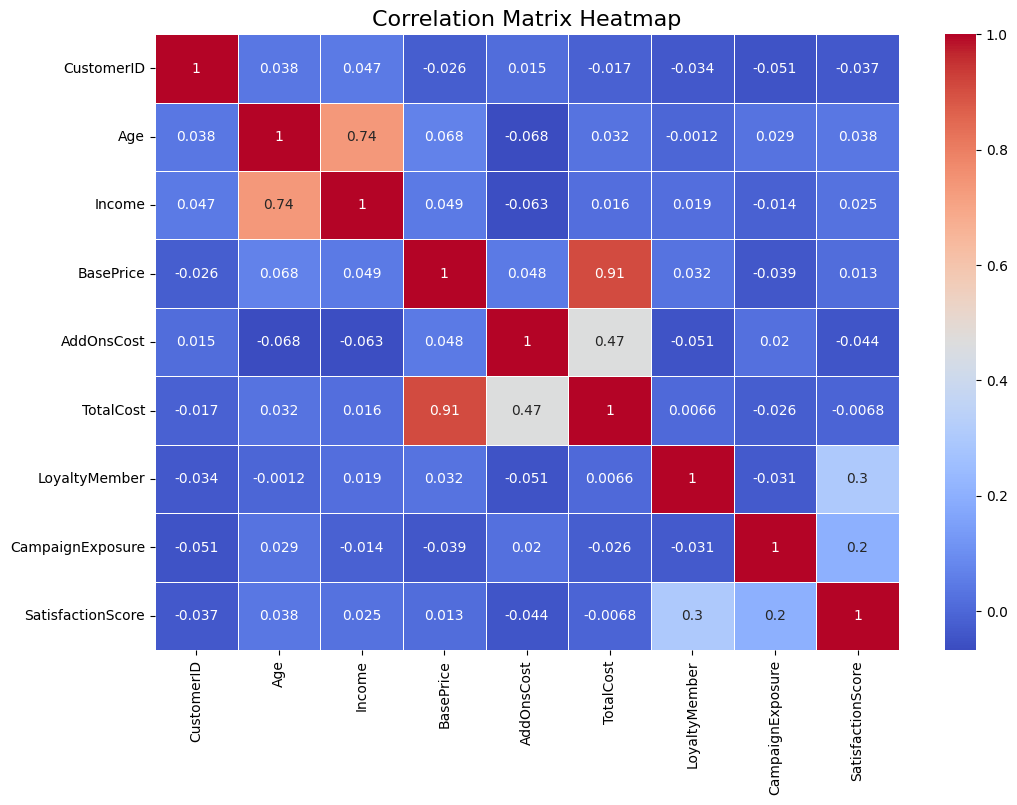

In [23]:
numeric_df = df.select_dtypes(include=['number'])
df_corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


###Scatterplots

#Age and Total Cost

<Axes: xlabel='Age', ylabel='TotalCost'>

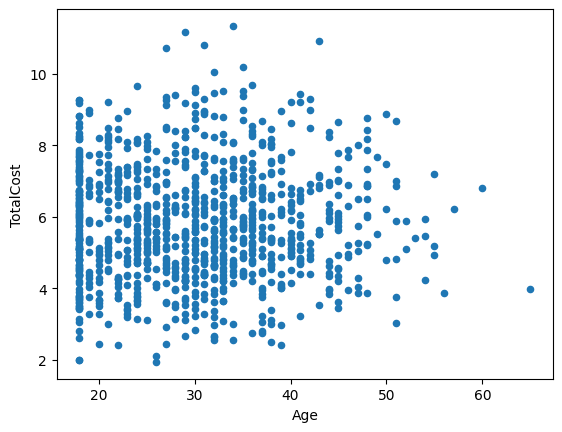

In [24]:
df.plot.scatter("Age","TotalCost")


#Income and Total Cost

<Axes: xlabel='Income', ylabel='TotalCost'>

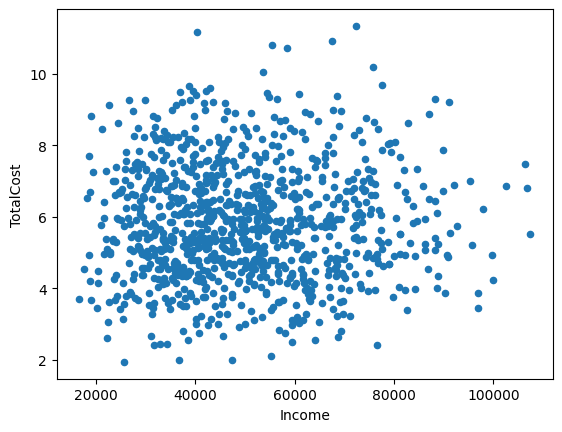

In [25]:
df.plot.scatter("Income","TotalCost")


#FEATURE ENGINEERING

#Age Groups

In [26]:
df["AgeGroup"] = pd.cut(df["Age"],
                        bins=[17, 25, 35, 50, 70],
                        labels=["18-25","26-35","36-50","50+"])


#Income Brackets

In [27]:
df["IncomeGroup"] = pd.cut(df["Income"],
                           bins=[0, 40000, 80000, 120000, 200000],
                           labels=["Low", "Mid", "Upper-Mid", "High"])


#Day encoding, weekend vs weekday

In [28]:
df["IsWeekend"] = df["DayOfWeek"].isin(["Saturday", "Sunday"]).astype(int)


#Spend Ratios

In [29]:
df["AddOnRatio"] = df["AddOnsCost"] / df["TotalCost"]


#Drink Category

In [30]:
drink_categories = [
    "Hot Coffee", "Cold Coffee", "Frappuccino Blended Beverage",
    "Starbucks Refreshers Beverage", "Hot Chocolate & More",
    "Hot Tea", "Cold Tea"
]

df["IsDrink"] = df["MenuCategory"].isin(drink_categories).astype(int)


#Order Size (Small/Medium/Large Spend)

In [31]:
df["SpendCategory"] = pd.cut(df["TotalCost"],
                              bins=[0, 6, 10, 20],
                              labels=["Low","Medium","High"])


#Loyalty × Spending Interaction

In [32]:
df["LoyaltySpendInteraction"] = df["LoyaltyMember"] * df["TotalCost"]


#ML Pipeline

In [33]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

numeric_features = [
    "Age", "Income", "BasePrice",
    "AddOnsCost", "TotalCost", "SatisfactionScore"
]

categorical_features = [
    "StoreLocation",
    "MenuCategory",
    "DayOfWeek"   # keep only existing fields
]

df["PaymentType"] = df["PaymentType"].map({"Card": 0, "App": 1})
#0 indicates card 1 indicates App

X = df[numeric_features + categorical_features]
y = df["PaymentType"]


preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


log_model = Pipeline([
    ("preprocess", preprocess),
    ("logreg", LogisticRegression(max_iter=800))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


log_model.fit(X_train, y_train)


y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       103
           1       0.89      0.90      0.89       147

    accuracy                           0.88       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.88      0.88      0.88       250

Confusion Matrix:
 [[ 87  16]
 [ 15 132]]
ROC-AUC: 0.9624199194240802


#Class: App

#Precision: 0.87 indicates When the model predicts App users, it is correct 87% of the time

#Recall: 0.89  indicates The model successfully finds 89% of all actual App users

#F1-Score: 0.88  indicates Strong balance between precision & recall

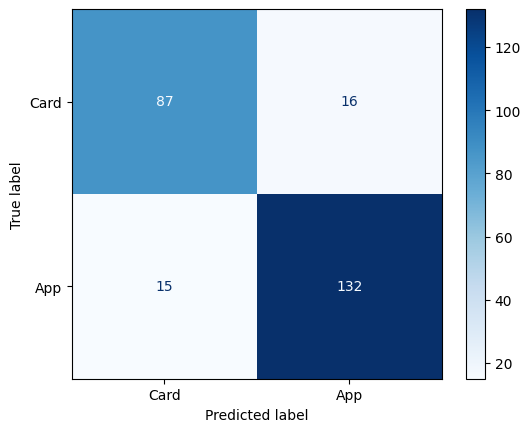

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Card", "App"])
disp.plot(cmap="Blues")


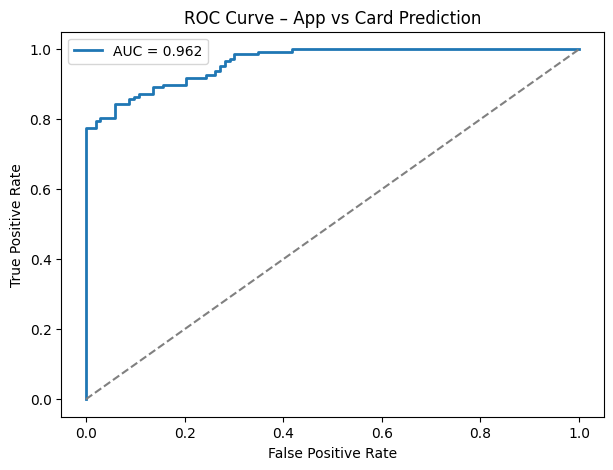

In [35]:
from sklearn.metrics import roc_curve, auc

# Probability that PaymentType = 1 (App user)
y_prob = log_model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – App vs Card Prediction")
plt.legend()
plt.show()


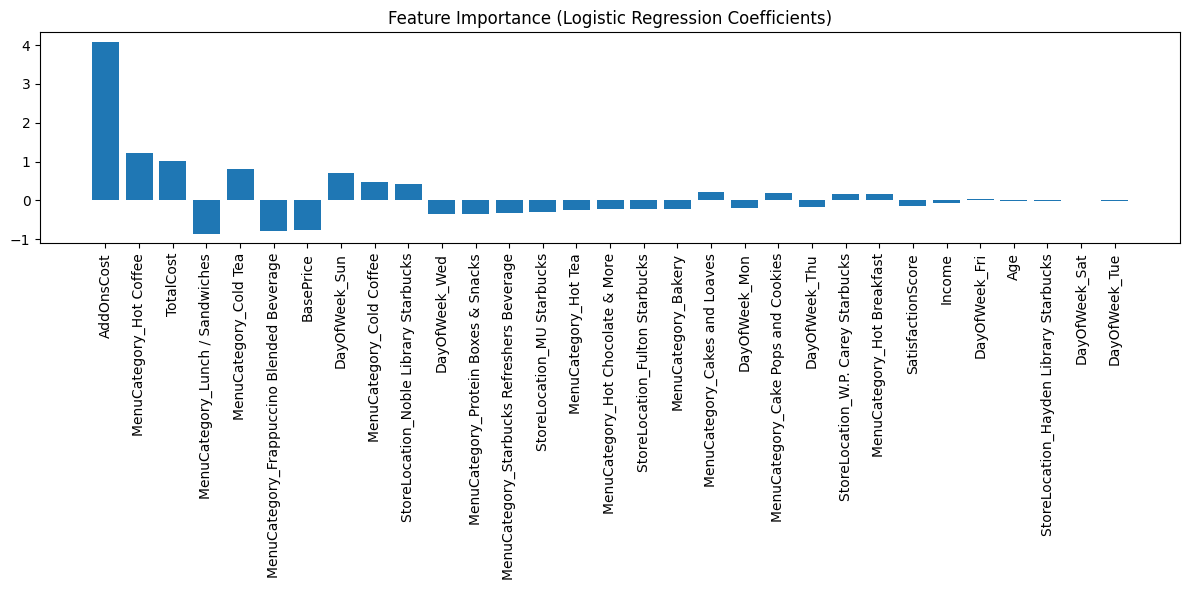

In [36]:


# Extract the trained logistic regression model
lr = log_model.named_steps["logreg"]

# Get categorical feature names after one-hot encoding
ohe = log_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = list(ohe.get_feature_names_out(categorical_features))

# Combine numeric + categorical names
feature_names = numeric_features + cat_feature_names

# Get coefficients
coeffs = lr.coef_[0]

# Sort by magnitude
indices = np.argsort(np.abs(coeffs))[::-1]

plt.figure(figsize=(12,6))
plt.bar(range(len(coeffs)), coeffs[indices])
plt.xticks(range(len(coeffs)), [feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.tight_layout()
plt.show()



#1 = App

#0 = Card

#Positive coefficient → more likely to use App
#Negative coefficient → more likely to use Card

#✔ Most powerful predictors of App vs Card usage:

#Add-ons cost — card users buy snacks

#Coffee categories — app users prefer them

#Store location — student hotspots drive app usage

#Order size — higher order value = app preferred

#Day of week — behavioral patterns exist

#✔ Business recommendations

#Introduce app-only snack bundles to convert walk-ins

#Offer loyalty points for high-value app orders

#Run location-specific offers at Fulton / Noble / MU

#Promote mid-week app discounts

#Target app onboarding campaigns at customers with:

#higher income

#frequent beverage purchases

#predictable ordering patterns

###Which customers are most likely to switch from Card to App, so Starbucks can send targeted app-only promotions?

In [37]:
df["App_Probability"] = log_model.predict_proba(X)[:,1]

###Filter only current Card users

In [38]:
card_users = df[df["PaymentType"] == "Card"]

###Identify Card users who have high probability of switching

In [39]:
high_switchers = card_users[card_users["App_Probability"] > 0.6]